# HW 3-1

~ Hsiao, Wei-pin @ NTNU Math

---

# Use NumPy to do FCM clustering.

## Import Data

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
target = iris['target']
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])

Plot Iris Data

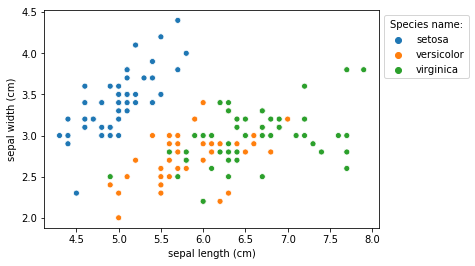

In [2]:
fig = sns.scatterplot(x = data.keys()[0], y = data.keys()[1],
                hue = iris['target_names'][target], data = data)
fig.legend(bbox_to_anchor=(1, 1), loc=2,title="Species name:")

## FCM Clustering with skfuzzy

In [3]:
import skfuzzy as fuzz
import numpy as np
import time
t = time.time()
for i in range(100):
    _, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        np.transpose(data), 3, 2, error=0.005, maxiter=1000, init=None)
t0 = time.time() - t

Defuzzilize Membership:

In [4]:
cluster_membership = np.argmax(u, axis=0)

Plot the membership:

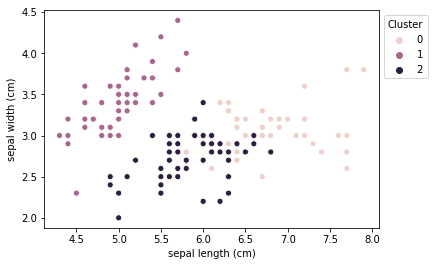

In [5]:
fig1 = sns.scatterplot(
    x=data.keys()[0], y=data.keys()[1], hue=cluster_membership, data=data)
fig1.legend(bbox_to_anchor=(1, 1), loc=2, title="Cluster")

## Self Design FCM Code

This FCM use matrix computation to accelerate speed:

In [6]:
def fuzzy_c_mean(x, c, m = 2, d = 10**(-3)):
    x = np.array(x); p = x.shape[1]; n = x.shape[0]
    range = np.array(x.max() - x.min())
    a0 = np.random.randn(c,p) * range + np.array(np.mean(data))
    a = a0; a_mi1 = a; time = 0; diff = 1;
    while diff > d:
        dis_sim = (np.tile(x,(c,1,1)) - \
                       np.transpose(np.tile(a,[n,1,1]),(1,0,2)))**(2/(m-1))
        dis_sim = dis_sim.sum(axis=2)
        u = 1 / (dis_sim * sum(1 / dis_sim))
        a = np.transpose(np.transpose(np.matmul(u ** m, x)) / np.sum(u ** m, axis = 1))
        a = a[a[:,0].argsort(),]

        diff = np.linalg.norm(a-a_mi1)
        a_mi1 = a
    return u, a, a0

Run iris data:

In [7]:
t = time.time()
for i in range(100):
    u, a, _ = fuzzy_c_mean(data, 3, 2, 0.005)
t1 = time.time() - t

Defuzzilize Membership:

In [8]:
cluster_membership = np.argmax(u, axis=0)

Plot the membership:

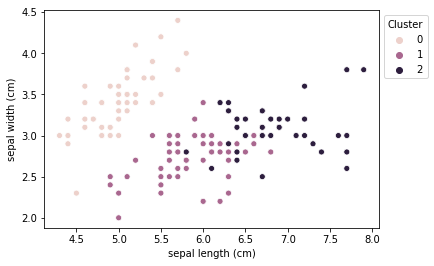

In [9]:
fig2 = sns.scatterplot(
    x=data.keys()[0], y=data.keys()[1], hue=cluster_membership, data=data)
fig2.legend(bbox_to_anchor=(1, 1), loc=2, title="Cluster")

## Compare Computing time Useing different methods

(In above section, we redoing FCM 100 times with same error and save the times they cost)

The time using `skfuzzy` is:

In [10]:
t0

0.8832337856292725

The time using self design code is:

In [11]:
t1

0.13870620727539062

The code base on matrix computation is faster.